In [32]:
import cyvcf2
import seaborn as sns
import pandas as pd
import numpy as np

In [33]:
vcf_file = "/home/hain/EMBL/inversions/homology/final_inv_calls_homology.vcf"

In [34]:
data = []
for record in cyvcf2.VCF(vcf_file):
    data.append({"SV": record.ID, "SVTYPE": record.INFO["SVTYPE"], "SVLEN": record.INFO["SVLEN"], "HOMLEN": record.INFO.get("HOMLEN", 0)})
df = pd.DataFrame(data)
df["LOG10_SVLEN"] = df["SVLEN"].apply(lambda x: abs(x)).apply(lambda x: np.log10(x + 1))
df["LOG10_HOMLEN"] = df["HOMLEN"].apply(lambda x: abs(x)).apply(lambda x: np.log10(x + 1))

<Axes: xlabel='LOG10_SVLEN', ylabel='LOG10_HOMLEN'>

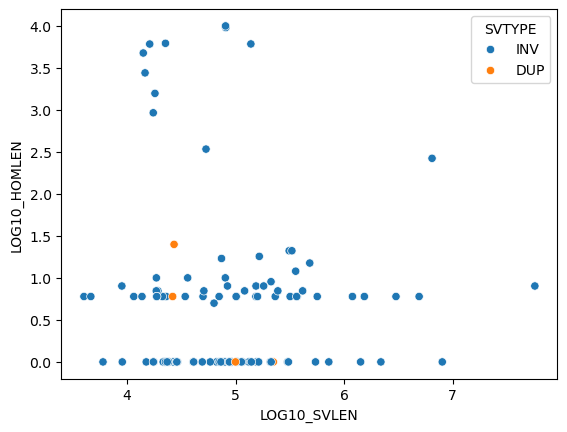

In [36]:
sns.scatterplot(data=df, x="LOG10_SVLEN", y="LOG10_HOMLEN", hue="SVTYPE")

In [45]:
df.sort_values(by="HOMLEN", ascending=False).head(20)

,SV,SVTYPE,SVLEN,HOMLEN,LOG10_SVLEN,LOG10_HOMLEN
60,INV366_HG02643,INV,80876,9918,4.907825,3.996468
11,INV411_NA19900,INV,81417,9501,4.910720,3.977815
12,INV410_HG02679,INV,81415,9501,4.910710,3.977815
10,INV411_HG02643,INV,81417,9501,4.910720,3.977815
9,INV410_HG02679,INV,81417,9501,4.910720,3.977815
53,INV89_HG02477,INV,22615,6158,4.354416,3.789510
47,INV77_HG03391,INV,138383,6053,5.141086,3.782042
75,INV200_HG00346,INV,16190,6039,4.209274,3.781037
13,INV415_HG03863,INV,14122,4724,4.149927,3.674402
33,INV397_HG02643,INV,14663,2740,4.166252,3.437909


In [37]:
candidates = pd.read_csv("/home/hain/EMBL/inversions/homology/final_candidate_homology.bed", sep="\t", header=None, names=["chrom", "start", "end", "sv_id", "score", "strand"])

In [38]:
candidates["HOMLEN"] = candidates["end"] - candidates["start"]
candidates["LOG10_HOMLEN"] = candidates["HOMLEN"].apply(lambda x: abs(x)).apply(lambda x: np.log10(x + 1))

In [39]:
candidates =candidates.drop_duplicates(subset=["sv_id", "HOMLEN"])

In [40]:
candidates

,chrom,start,end,sv_id,score,strand,HOMLEN,LOG10_HOMLEN
0,chrX,71429572,71439061,INV410_HG02679_LEFT,1,-,9489,3.977266
1,chrX,71510989,71520476,INV410_HG02679_RIGHT,1,+,9487,3.977175
2,chrX,71430062,71438560,INV410_HG02679_LEFT,1,-,8498,3.929368
3,chrX,71511477,71519975,INV410_HG02679_RIGHT,1,+,8498,3.929368
4,chrX,71431062,71437560,INV410_HG02679_LEFT,1,-,6498,3.812847
...,...,...,...,...,...,...,...,...
611,chr3,15142535,15142810,INV269_HG00449_RIGHT,1,+,275,2.440909
650,chr3,8684294,8684554,INV269_HG00449_LEFT,1,-,260,2.416641
651,chr3,15142548,15142810,INV269_HG00449_RIGHT,1,+,262,2.419956
652,chr3,8684305,8684532,INV269_HG00449_LEFT,1,-,227,2.357935


<Axes: xlabel='LOG10_HOMLEN', ylabel='Count'>

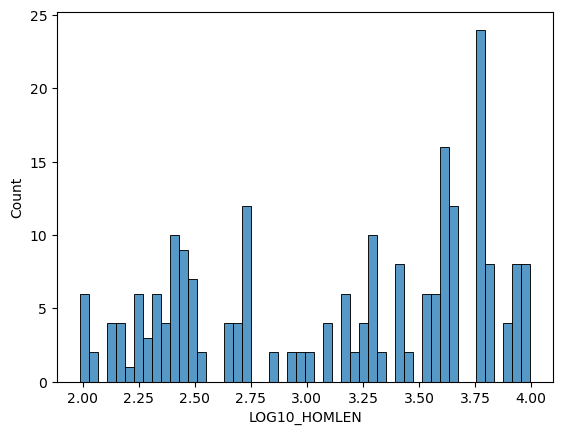

In [41]:
sns.histplot(data=candidates, x="LOG10_HOMLEN", bins=50)